In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


# --- Chapter 1: Understand the Training Data ---

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
print("Dataset loaded successfully.")

# Initial exploration
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
df.info()

print("\nSummary statistics:")
print(df.describe())

print("\nValue counts for the target variable 'Personality':")
print(df['Personality'].value_counts())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset loaded successfully.

First 5 rows of the dataset:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Information about the

# --- Chapter 2: Data Analysis and Visualization ---

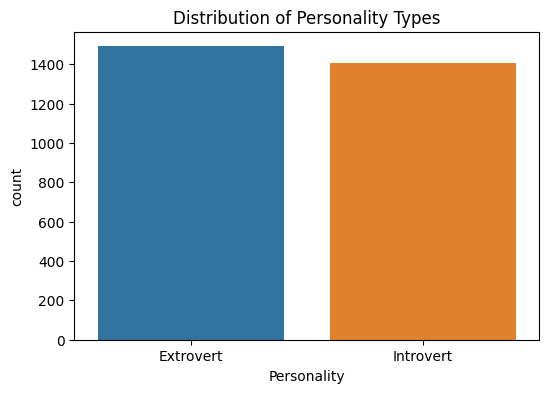

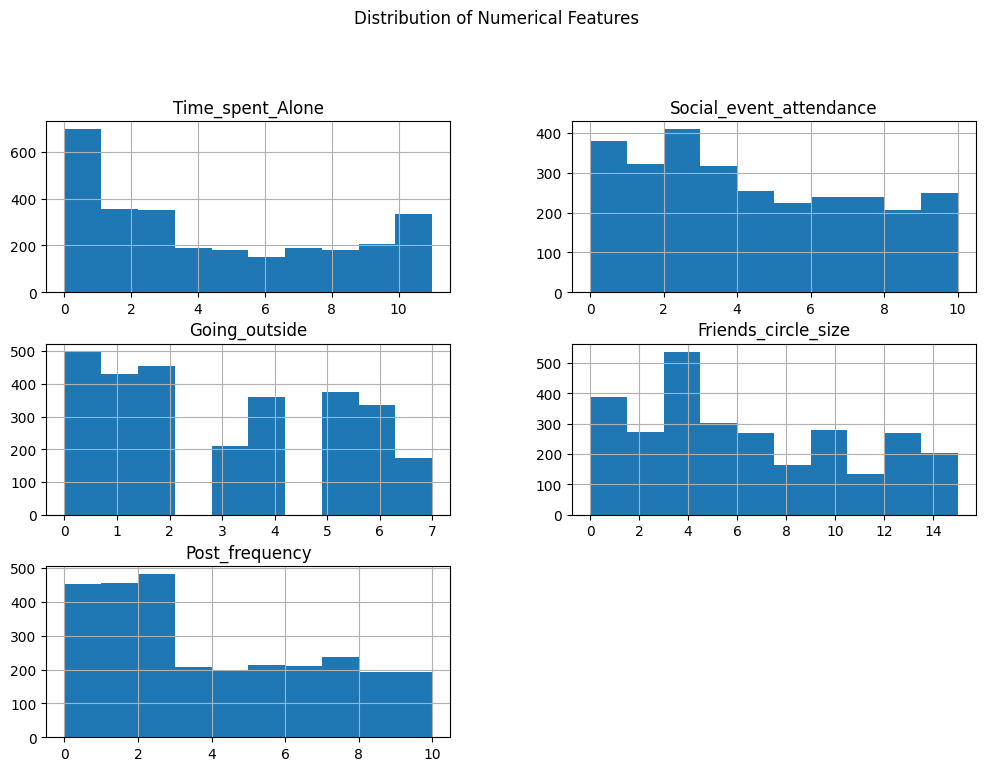

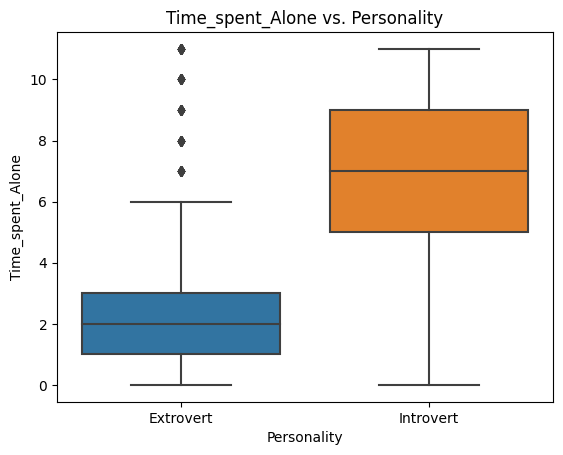

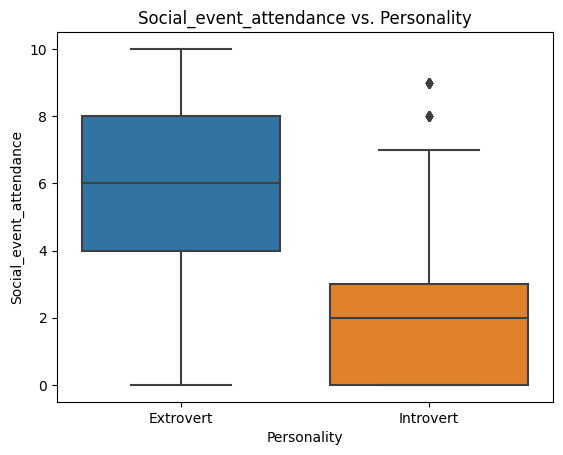

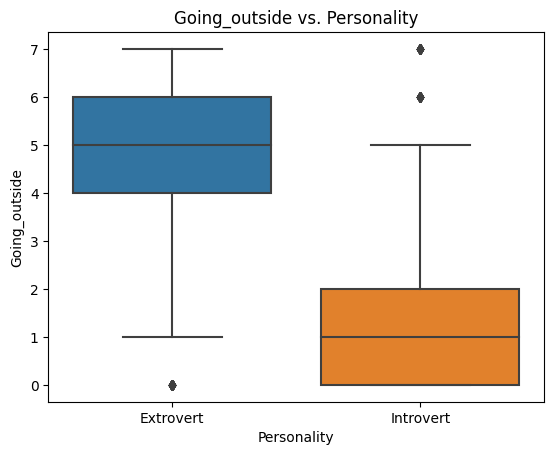

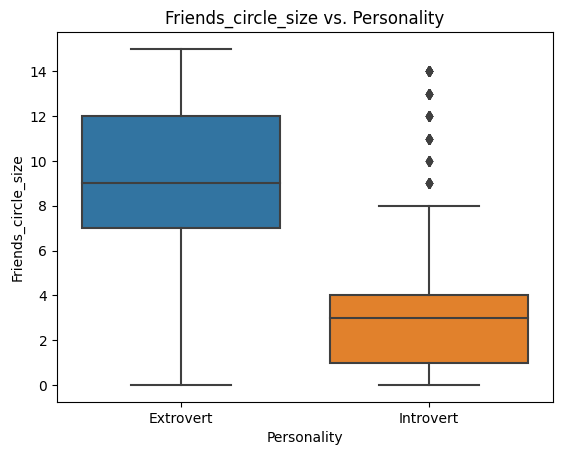

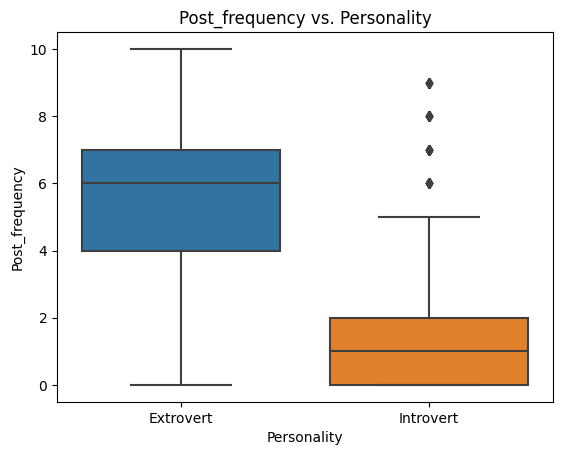

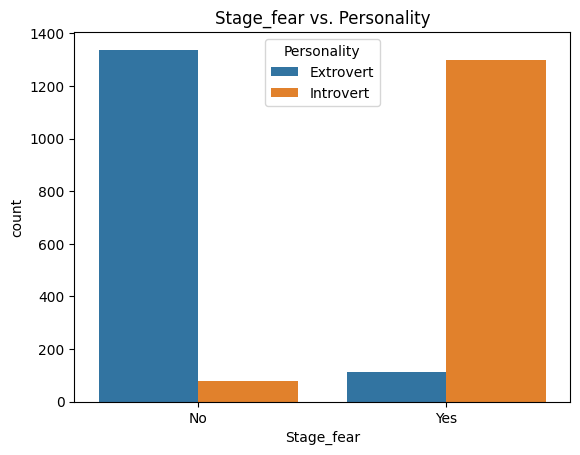

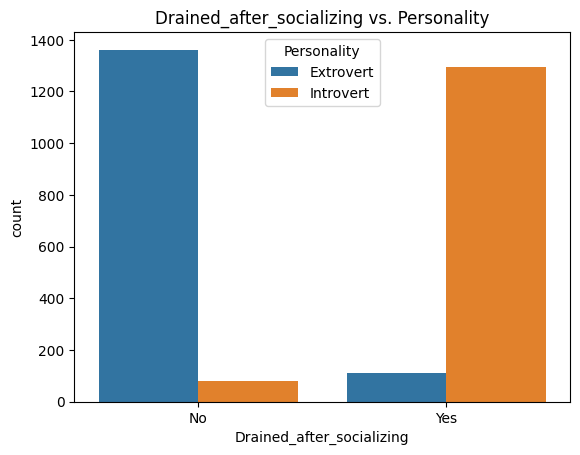

In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Personality Types')
plt.show()

# Visualize the distribution of numerical features
numerical_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
df[numerical_features].hist(figsize=(12, 8), bins=10)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

# Explore relationships between numerical features and Personality
for feature in numerical_features:
    sns.boxplot(x='Personality', y=feature, data=df)
    plt.title(f'{feature} vs. Personality')
    plt.show()

# Explore the relationship between categorical features and Personality
categorical_features = ['Stage_fear', 'Drained_after_socializing']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Personality', data=df)
    plt.title(f'{feature} vs. Personality')
    plt.show()

# --- Chapter 3: Data Cleaning and Preprocessing ---

In [5]:
# Identify numerical and categorical columns
numerical_cols_with_na = ['Social_event_attendance', 'Friends_circle_size', 'Post_frequency', 'Time_spent_Alone', 'Going_outside']
categorical_cols_with_na = ['Stage_fear', 'Drained_after_socializing']

# Impute missing numerical values with the mean
imputer_numerical = SimpleImputer(strategy='mean')
df[numerical_cols_with_na] = imputer_numerical.fit_transform(df[numerical_cols_with_na])

# Impute missing categorical values with the most frequent
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols_with_na] = imputer_categorical.fit_transform(df[categorical_cols_with_na])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Check for any remaining NaNs in the entire DataFrame
print("\nAre there any NaNs in the DataFrame after imputation?", df.isnull().any().any())

# Encode categorical features
label_encoder = LabelEncoder()
df['Stage_fear'] = label_encoder.fit_transform(df['Stage_fear']) # Yes=1, No=0
df['Drained_after_socializing'] = label_encoder.fit_transform(df['Drained_after_socializing']) # Yes=1, No=0
df['Personality'] = label_encoder.fit_transform(df['Personality']) # Extrovert=0, Introvert=1
print("\nEncoded categorical features:")
print(df[['Stage_fear', 'Drained_after_socializing', 'Personality']].head())

# Separate features (X) and target (y)
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
numerical_features_for_scaling = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
X_train[numerical_features_for_scaling] = scaler.fit_transform(X_train[numerical_features_for_scaling])
X_test[numerical_features_for_scaling] = scaler.transform(X_test[numerical_features_for_scaling])

print("\nScaled training data:")
print(X_train.head())


Missing values after imputation:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Are there any NaNs in the DataFrame after imputation? False

Encoded categorical features:
   Stage_fear  Drained_after_socializing  Personality
0           0                          0            0
1           1                          1            1
2           1                          1            1
3           0                          0            0
4           0                          0            0

Scaled training data:
      Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
432           1.004162           1                -0.678932      -0.459550   
1414          1.004162           1                -1.029316      -0.907193   
1913         -1.303165          

# --- Chapter 4: Model Training ---

##  Logistic Regression model


Accuracy of the Logistic Regression model: 0.9172

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.93      0.90      0.92       447
   Introvert       0.90      0.93      0.92       423

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870



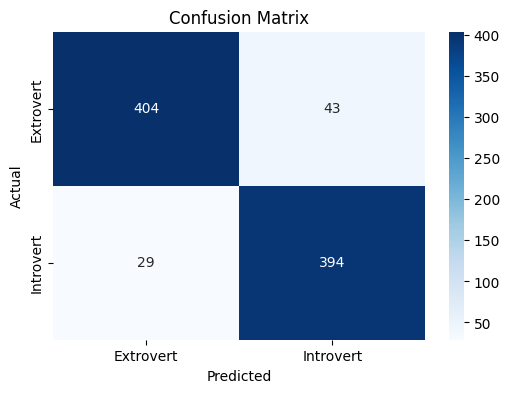

In [6]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Logistic Regression model: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Extrovert', 'Introvert']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- Chapter 5: Exploring Other Models ---

## Random Forest & SVM 


Accuracy of the Random Forest model: 0.9011

Random Forest Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.91      0.90      0.90       447
   Introvert       0.89      0.91      0.90       423

    accuracy                           0.90       870
   macro avg       0.90      0.90      0.90       870
weighted avg       0.90      0.90      0.90       870



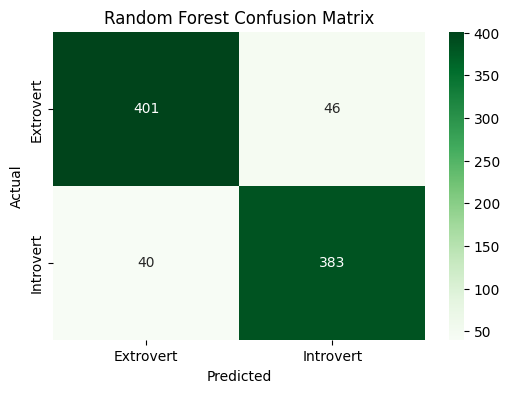


Accuracy of the SVM model: 0.9195

SVM Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       447
   Introvert       0.90      0.94      0.92       423

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870



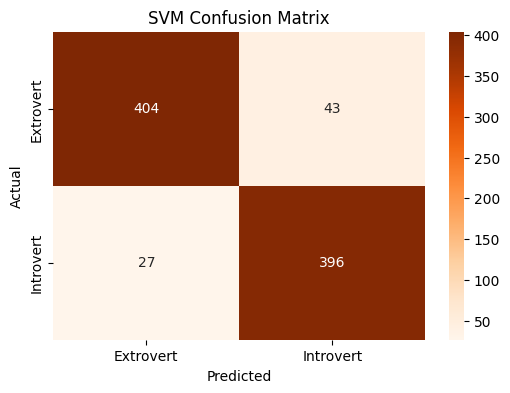

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\nAccuracy of the Random Forest model: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=['Extrovert', 'Introvert']))
cm_rf = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"\nAccuracy of the SVM model: {svm_accuracy:.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred, target_names=['Extrovert', 'Introvert']))
cm_svm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# --- Chapter 6: Hyperparameter Tuning ---

## SVM Model Tuning 

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9408866995073891

Test accuracy of the best SVM model: 0.9195

Classification Report of the best SVM model:
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       447
   Introvert       0.90      0.94      0.92       423

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870



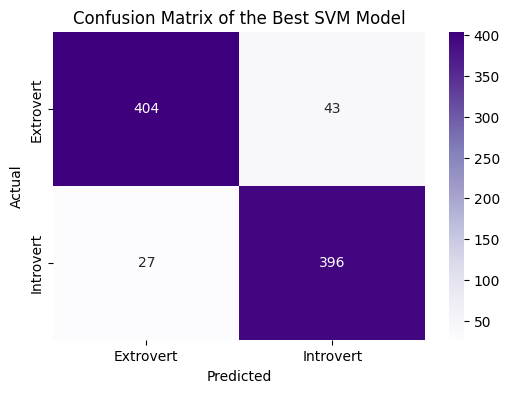

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("\nBest parameters for SVM:", best_params_svm)
print("Best cross-validation accuracy for SVM:", best_score_svm)

# Evaluate the best SVM model on the test set
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"\nTest accuracy of the best SVM model: {accuracy_best_svm:.4f}")
print("\nClassification Report of the best SVM model:")
print(classification_report(y_test, y_pred_best_svm, target_names=['Extrovert', 'Introvert']))

# Confusion Matrix for the best SVM model
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Best SVM Model')
plt.show()

# --- Chapter 7: Feature Importance ---

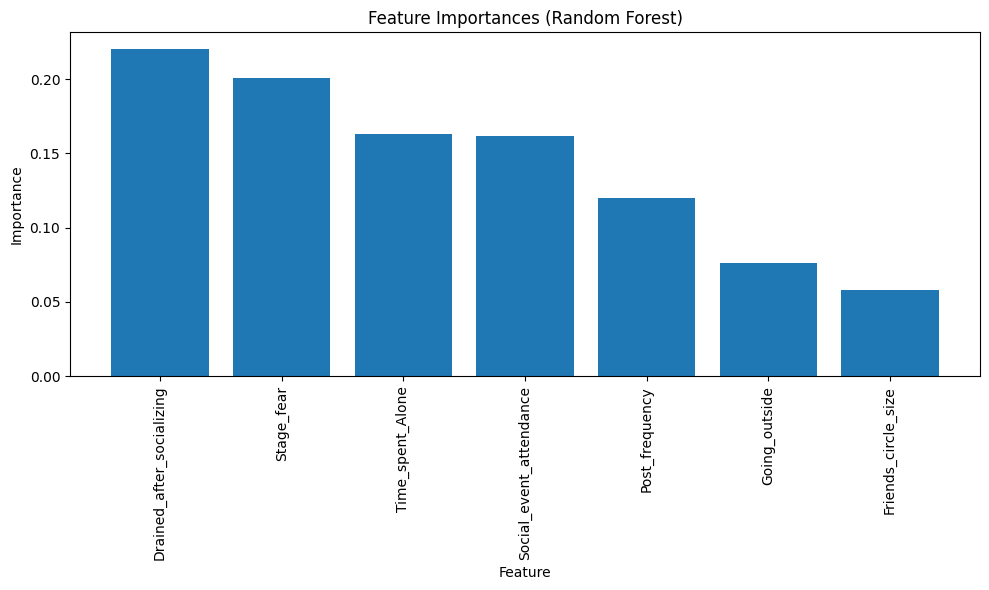


Feature Importances (Random Forest):
Drained_after_socializing: 0.2205
Stage_fear: 0.2006
Time_spent_Alone: 0.1629
Social_event_attendance: 0.1619
Post_frequency: 0.1197
Going_outside: 0.0764
Friends_circle_size: 0.0581


In [9]:
# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Print the feature importances
print("\nFeature Importances (Random Forest):")
for i in range(X_train.shape[1]):
    print(f"{feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]:.4f}")

# --- Chapter 8: Summary of Results ---


The **Support Vector Machine (SVM) model** achieved the highest test accuracy of around **91.95%**. **Logistic Regression** also performed very well with an accuracy of about **91.72%**. The Random Forest model had a slightly lower accuracy.

The feature importance analysis from the Random Forest provided insights into which behavioral traits are most indicative of personality type within this dataset.
